In [4]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, 
        SpecialFunctions
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\H{{\mathbb H}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\FF{{\cal F}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqand{\qquad\hbox{and}\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\erfc{\,{\rm erfc}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\br[#1]{\left[#1\right]}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
\def\fL{f_{\rm L}}
\def\fR{f_{\rm R}}
\def\questionequals{= \!\!\!\!\!\!{\scriptstyle ? \atop }\,\,\,}
$$

Dr Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes



# Lecture 23:  Cauchy transforms on the real line

Last lecture we saw that  integral equation
$$
\lambda u(x) + \int_{0}^\infty K(x-t)u(t) \dt = f(x)\qqfor 0 < x < \infty.
$$
could be transformmed into a Riemann–Hilbert problem: find $\Phi(z)$ analytic off $\R$ such that
$$
\Phi_+(s) - g(s)\Phi_-(s) = h(s) \qqand \Phi(\infty) = C
$$
where $\Phi_\pm(s) = \lim_{\epsilon \rightarrow 0} \Phi(s \pm \I \epsilon)$ are the limits from above and below.  

We now wish to study the solution of this equations, using the Plemelj theorem. But to do this we need to discuss Cauchy transforms on the real line

Outline:

2. Cauchy transforms on the Real line
3. Application: Calculating error functions
   
   
   
## Cauchy transforms on the real line

Not surprisingly, the key tool to solving the Riemann–Hilberrt problem is going to be the Cauchy transform over the real line:
$$
\CC_\R f(z) = {1 \over 2 \pi \I}\int_{-\infty}^\infty {f(s)  \over s-z} \D s
$$

This is no longer analytic at $\infty$ because the contour of integration passes through there, but we still have Plemelj's theorem under reasonable assumptions:

**Theorem (Plemelj on the real line)**  Assume that $f : \R \rightarrow \C$ is continuously-differentiable and both it and its derivatives are absolutely integrable. Then $\CC f(z)$ is the unique function satisfying the following properties:
1. $\CC f(z)$ is analytic off $\R$
2. $\lim_{z\rightarrow \infty} \CC f(z) = 0$ in any direction
3. $\CC^+ f(x) - \CC^- f(x)  = f(x)$ for $x \in \R$



### Application: Calculating error functions

Consider the complementary Error function
$$
\erfc z = {2 \over \sqrt \pi} \int_z^\infty \E^{-\zeta^2} \D \zeta.
$$
We will show that this special function can be reduced to a Cauchy transform over the real line.
This function is particularly important in statistics: on the real axis $1-\erfc x$  gives the cummulative density function (CDF) of the Gaussian distribution:

$$\int_{-\infty}^x {\E^{-x^2} \over \sqrt \pi} \dx = 1-{\erfc x\over 2}$$

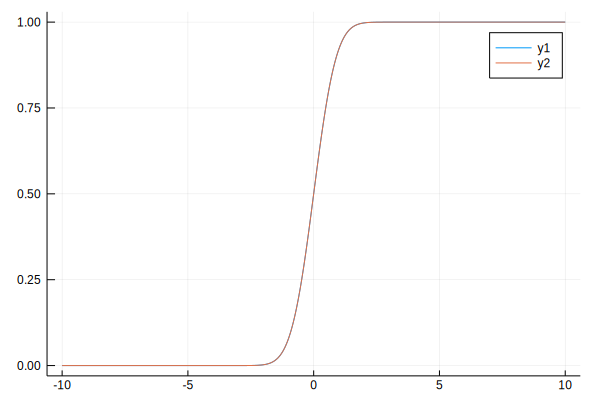

In [5]:
x = Fun(-10 .. 10)
plot(cumsum(exp(-x^2)/sqrt(π)))
plot!(1-erfc(x)/2)

Note that $\erfc z$ is entire (it's complex-derivative is of course ${2 \over \sqrt \pi} \E^{-z^2}$) but is not nice at $\infty$:

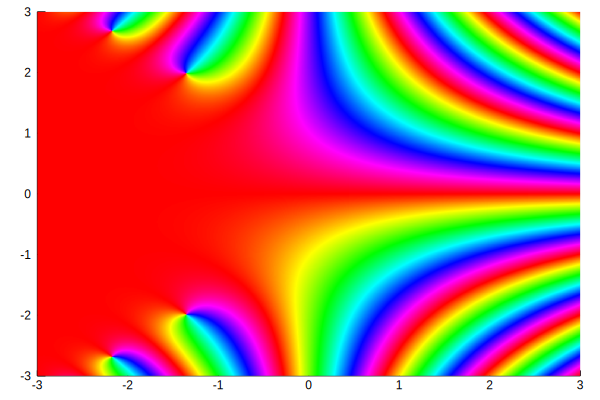

In [6]:
phaseplot(-3..3, -3..3, z -> erfc(z))

But integrating by parts we see that the dominant behaviour is like $\E^{-z^2}$, 
$$
\int_z^\infty \E^{-\zeta^2} \D \zeta = \int_z^\infty  -2\zeta {\E^{-\zeta^2} \over -2 \zeta}  \D \zeta = {\E^{-z^2} \over 2 z} -\int_z^\infty {\E^{-\zeta^2} \over 2 \zeta^2} \D \zeta
$$
and indeed $\E^{z^2} \erfc z$ decays in the right-half plane:

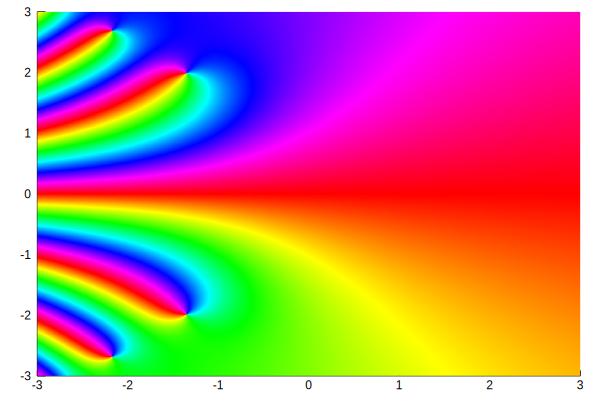

In [7]:
phaseplot(-3..3, -3..3, z -> exp(z^2)erfc(z))

Note that 
$$
{2 \over \sqrt\pi} \int_{-\infty}^z \E^{-\zeta^2} \D \zeta = {2 \over \sqrt\pi} \left[\int_{-\infty}^\infty - \int_z^\infty\right] \E^{-\zeta^2} \D \zeta = 2 - \erfc(z)
$$
and has similar properties in the left-hand plane:

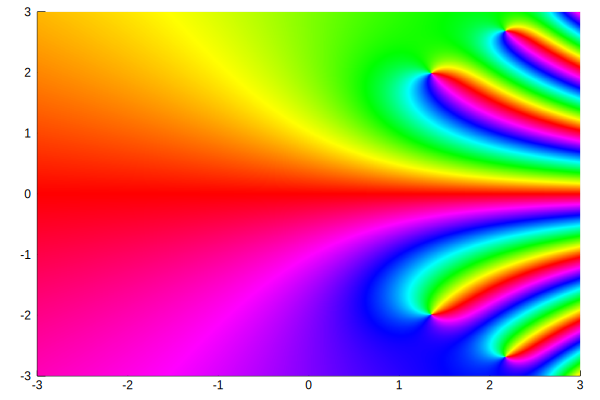

In [8]:
phaseplot(-3..3, -3..3, z -> exp(z^2)*(2-erfc(z)))

Now consider the function
$$
\phi(z) = \begin{cases}     \E^{z^2}(2-\erfc( z) )& \Re z < 0 \\
                            -\E^{z^2} \erfc(z) & \Re z > 0 
                            \end{cases}
$$
This decays everywhere, and has the jumps for $s$ on the imaginary axis:
$$
\phi_+(s) - \phi_-(s) = 2\E^{s^2} 
$$
where we have oriented from $-\I\infty$ to $\I \infty$, hence $\phi_+(s) = \lim_{\epsilon\rightarrow 0} \phi(s-\epsilon)$ and $\phi_-(s) = \lim_{\epsilon\rightarrow 0} \phi(s+\epsilon)$.

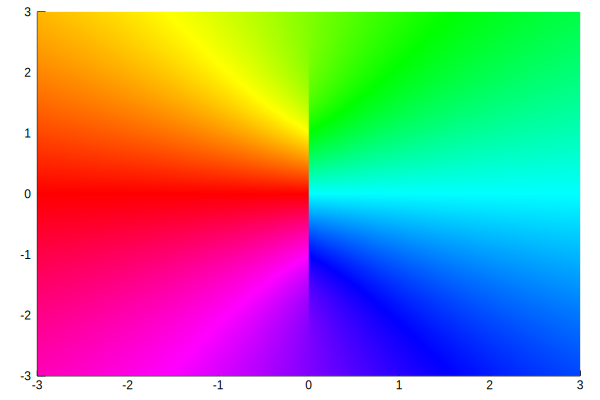

In [9]:
φ = z -> real(z) < 0 ? 
            exp(z^2)*(2-erfc(z)) : 
           -exp(z^2)*erfc(z)

phaseplot(-3..3, -3..3, φ)

In [10]:
s = im
φ(s-eps())-φ(s+eps())

0.7357588823428849 + 0.0im

In [11]:
2exp(s^2)

0.7357588823428847 + 0.0im

Thus by Plemelj, we have
$$
\phi(z) = 2\CC_{(-\I\infty,\I\infty)}[\E^{\diamond^2}](z)
$$
or by rotating to the real axis,
$$
\phi(z) = 2\CC_{(-\infty,\infty)}[\E^{-\diamond^2}](-\I z).
$$
In other words,
$$
\erfc  z = -2 \E^{-z^2}\CC_{(-\infty,\infty)}[\E^{-\diamond^2}](-\I z) + \begin{cases}
2 & \Re z < 0 \\
0 & \Re z > 0
\end{cases}
$$

In [12]:
let f = Fun(x -> exp(-x^2), PeriodicLine())
    global myerf(z) =  -2exp(-z^2)*cauchy(f, -im*z) + (real(z) < 0 ? 2 : 0)
end

myerf (generic function with 1 method)

In [15]:
z = -2.0+2.0im
@time myerf(z)

  0.000814 seconds (5.30 k allocations: 266.672 KiB)


2.151310866398069 - 0.12729162946314043im

In [16]:
@time erfc(z)

  0.000005 seconds (5 allocations: 192 bytes)


2.151310866398069 - 0.12729162946314082im